# COVID-19 - Uma análise exploratória sobre a pandemia do coranavírus

In [1]:
#Bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Dados Iniciais - COVID-19 no mundo

In [64]:
#Dados Mundiais

df_world = pd.read_csv('WHO-COVID-19-global-data.csv')
df_world

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
249082,2022-11-14,ZW,Zimbabwe,AFRO,0,257893,0,5606
249083,2022-11-15,ZW,Zimbabwe,AFRO,0,257893,0,5606
249084,2022-11-16,ZW,Zimbabwe,AFRO,0,257893,0,5606
249085,2022-11-17,ZW,Zimbabwe,AFRO,0,257893,0,5606


In [114]:
#Tratando a Base de Dados - Limpando linhas sem Casos Registrados a partir dos dados acumulados

filtered_world = (df_world['Cumulative_cases'] != 0)
df_world_filtered = df_world[filtered_world]
df_world_filtered

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
52,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
53,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
54,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
55,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
56,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
249082,2022-11-14,ZW,Zimbabwe,AFRO,0,257893,0,5606
249083,2022-11-15,ZW,Zimbabwe,AFRO,0,257893,0,5606
249084,2022-11-16,ZW,Zimbabwe,AFRO,0,257893,0,5606
249085,2022-11-17,ZW,Zimbabwe,AFRO,0,257893,0,5606


In [125]:
#1ª morte registrada no mundo

first_deaths_worlds = df_world_filtered.loc[df_world_filtered['Cumulative_deaths']== 1]
first_deaths_worlds.sort_values(by=['Date_reported']).head(1)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
44151,2020-01-12,CN,China,WPRO,41,45,1,1


In [116]:
#Primeiros Casos Registrados no Mundo

df_world_filtered.sort_values(by=['Date_reported']).head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
44143,2020-01-04,CN,China,WPRO,1,1,0,0
81979,2020-01-04,DE,Germany,EURO,1,1,0,0
74622,2020-01-04,FI,Finland,EURO,1,1,0,0
44144,2020-01-05,CN,China,WPRO,0,1,0,0
81980,2020-01-05,DE,Germany,EURO,0,1,0,0


In [96]:
#Total de Casos e Óbitos por país

df_world_filtered = df_world[['Country','Cumulative_deaths','Cumulative_cases']].groupby('Country', as_index=False).max()
df_world_filtered

,Country,Cumulative_deaths,Cumulative_cases
0,Afghanistan,7829,204610
1,Albania,3594,332106
2,Algeria,6881,270952
3,American Samoa,34,8262
4,Andorra,156,46824
...,...,...,...
232,Wallis and Futuna,7,3415
233,Yemen,2159,11945
234,Zambia,4017,333685
235,Zimbabwe,5606,257893


In [102]:
#Países com maior número de mortes

df_world_filtered.sort_values(by=['Cumulative_deaths']).tail()

,Country,Cumulative_deaths,Cumulative_cases
134,Mexico,330444,7118933
173,Russian Federation,391333,21525567
96,India,530553,44667967
28,Brazil,688764,34938073
226,United States of America,1064975,96752266


In [103]:
#Países com maior número de casos

df_world_filtered.sort_values(by=['Cumulative_cases']).tail()

,Country,Cumulative_deaths,Cumulative_cases
28,Brazil,688764,34938073
78,Germany,156410,36180077
72,France,154487,36200221
96,India,530553,44667967
226,United States of America,1064975,96752266


<AxesSubplot:xlabel='Country'>

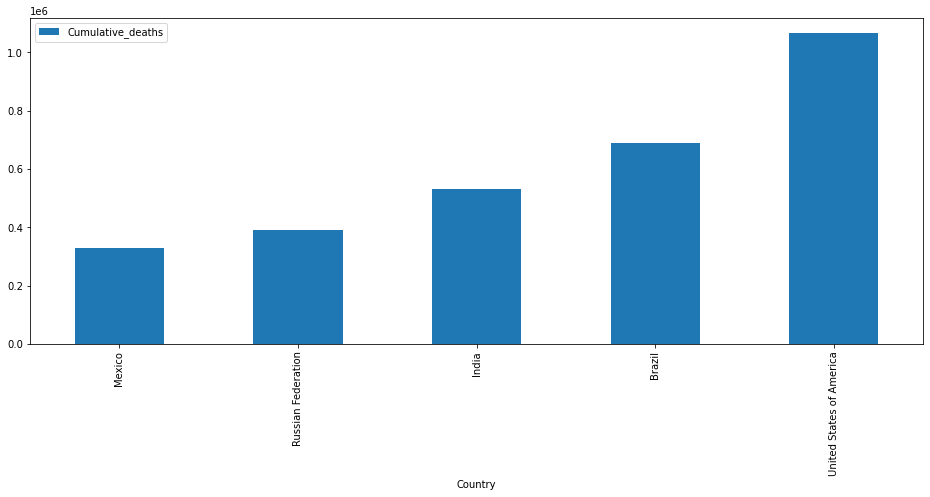

In [98]:
#Gráfico com os 5 países com mais óbitos

df_world_filtered.sort_values(by=['Cumulative_deaths']).tail().plot.bar(x='Country', y='Cumulative_deaths', figsize=(16,6))



<AxesSubplot:xlabel='Country'>

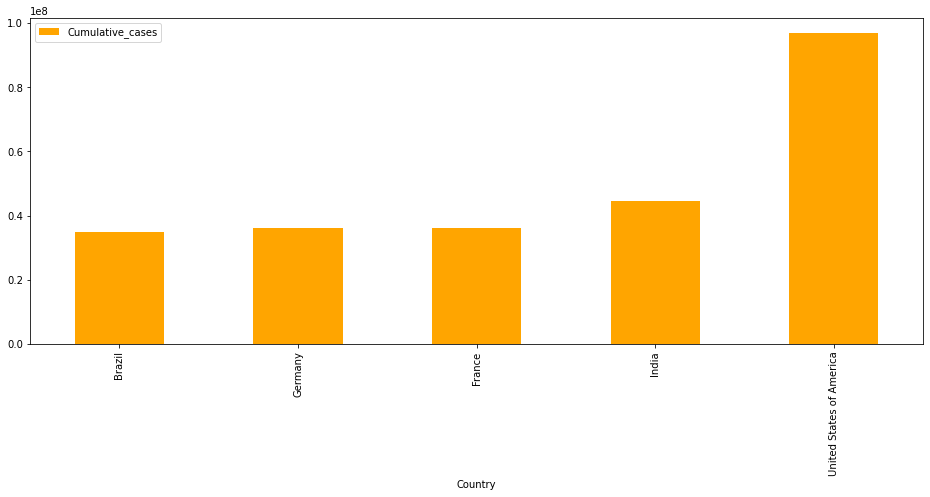

In [104]:
#Gráfico com os 5 países com mais casos

df_world_filtered.sort_values(by=['Cumulative_cases']).tail().plot.bar(x='Country', y='Cumulative_cases', figsize=(16,6), color='orange')


# COVID-19 - Dados no Brasil

In [2]:
#Dados sobre casos por cidades do Brasil - 2020

base_2020 = pd.read_csv('cases-brazil-cities-time_2020.csv', index_col='date', parse_dates=True)
base_2020

,epi_week,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
date,,,,,,,,,,,
2020-02-25,9,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000
2020-02-25,9,TOTAL,TOTAL,0,0,0,1,1,0.000,0.000,0.000
2020-02-26,9,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
2020-02-26,9,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000
2020-02-27,9,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,53,PR,Ângulo/PR,4101150,0,2,0,112,68.236,3821.221,0.018
2020-12-31,53,BA,Érico Cardoso/BA,2900504,0,2,5,96,19.024,913.155,0.021
2020-12-31,53,PA,Óbidos/PA,1505106,0,47,7,3296,89.570,6281.326,0.014


In [3]:
#1º Caso Confirmado

base_2020.iloc[0]

epi_week                                      9
state                                        SP
city                               São Paulo/SP
ibgeID                                  3550308
newDeaths                                     0
deaths                                        0
newCases                                      1
totalCases                                    1
deaths_per_100k_inhabitants                 0.0
totalCases_per_100k_inhabitants           0.008
deaths_by_totalCases                        0.0
Name: 2020-02-25 00:00:00, dtype: object

In [4]:
#Filtrando a base com as informações que serão utilizadas

filtered_2020 = (base_2020['state'] != 'TOTAL') & (base_2020['deaths'] != 0)
base_2020_filtered = base_2020[filtered_2020]
base_2020_filtered.drop(columns=['ibgeID', 'city', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases'])

,epi_week,state,newDeaths,deaths,newCases,totalCases
date,,,,,,
2020-03-17,12,SP,1,1,11,156
2020-03-18,12,SP,1,1,0,0
2020-03-18,12,SP,2,3,58,214
2020-03-19,12,RJ,1,1,1,1
2020-03-19,12,RJ,1,1,1,7
...,...,...,...,...,...,...
2020-12-31,53,SP,0,4,0,42
2020-12-31,53,RS,0,1,0,73
2020-12-31,53,PR,0,2,0,112


In [5]:
#Casos e Mortes por Estado

df_state_2020 = base_2020_filtered[['newDeaths', 'state', 'newCases']].groupby('state', as_index=False).sum()
df_state_2020

,state,newDeaths,newCases
0,AC,815,41632
1,AL,2504,101526
2,AM,5452,196262
3,AP,955,69500
4,BA,9133,463075
5,CE,10105,326274
6,DF,4259,251441
7,ES,5084,244663
8,GO,6830,299086
9,MA,4508,177667


<AxesSubplot:ylabel='state'>

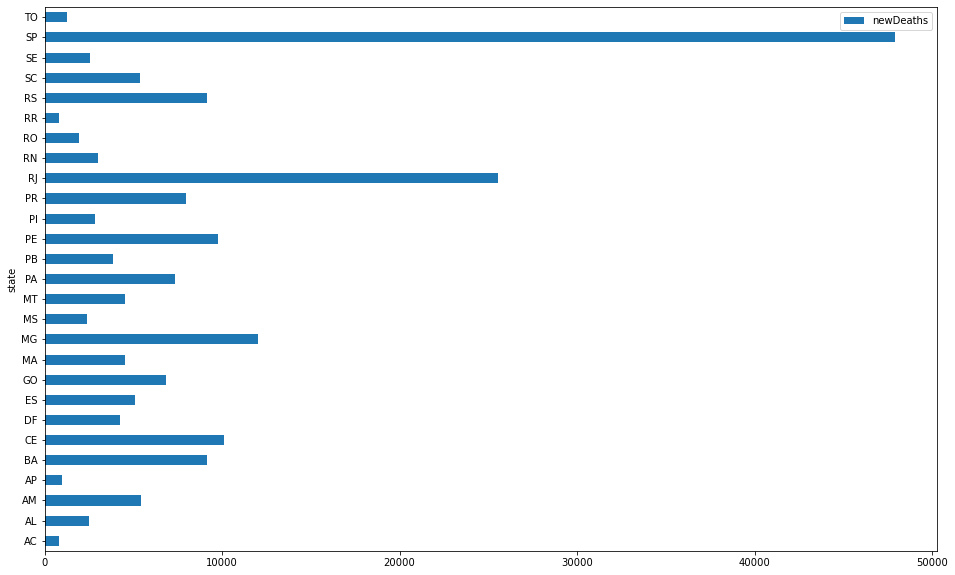

In [6]:
#Total de Mortes por Estado - 2020

base_2020_filtered[['newDeaths', 'state', 'newCases']].groupby('state', as_index=False).sum().plot.barh(x='state', y='newDeaths', figsize=(16,10))

<AxesSubplot:xlabel='state', ylabel='newDeaths'>

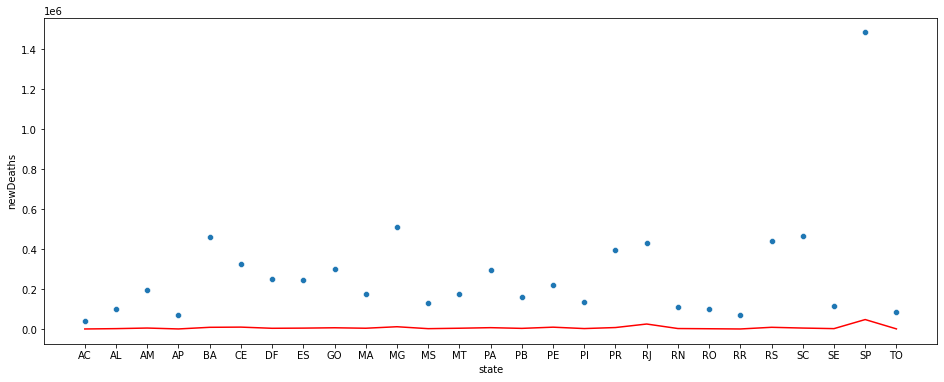

In [7]:
#Contaminação e óbitos por estado - 2020

plt.figure(figsize=(16,6))
sns.lineplot(data=df_state_2020, x='state', y='newDeaths', color = 'red')
sns.scatterplot(data=df_state_2020, x='state', y='newCases')

In [8]:
#Agrupamento por data - Casos e Óbitos - 2020

df_base_2020 = base_2020_filtered[['newDeaths','newCases']].groupby('date').sum()
df_base_2020


,newDeaths,newCases
date,,
2020-03-17,1,11
2020-03-18,3,58
2020-03-19,4,47
2020-03-20,4,47
2020-03-21,7,69
...,...,...
2020-12-27,337,17454
2020-12-28,541,26986
2020-12-29,1066,56216


In [9]:
#Dados Estatísticos - 2020

df_base_2020.describe()

,newDeaths,newCases
count,290.000000,290.000000
mean,682.917241,25850.368966
std,383.472073,16829.740622
min,1.000000,11.000000
25%,380.250000,13026.000000
50%,679.500000,24734.000000
75%,984.000000,38802.250000
max,1510.000000,68260.000000


In [10]:
#Maior número de óbitos em 2020

df_base_2020.loc[df_base_2020['newDeaths']==1510]

,newDeaths,newCases
date,,
2020-06-04,1510,29391


<AxesSubplot:xlabel='date', ylabel='newDeaths'>

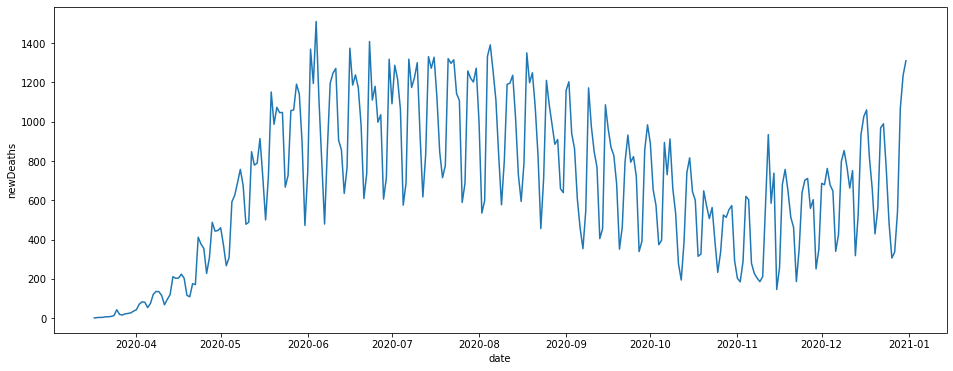

In [11]:
#Evolução dos óbitos em 2020

plt.figure(figsize=(16,6))
sns.lineplot(data=df_base_2020, x='date', y='newDeaths')

In [12]:
#Dados sobre casos por cidades do Brasil - 2021

base_2021 = pd.read_csv('cases-brazil-cities-time_2021.csv', index_col='date', parse_dates=True)
base_2021

,epi_week,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
date,,,,,,,,,,,
2021-01-01,53,GO,Abadia de Goiás/GO,5200050,0,8,0,763,87.355,8331.513,0.010
2021-01-01,53,MG,Abadia dos Dourados/MG,3100104,0,1,0,110,14.241,1566.505,0.009
2021-01-01,53,GO,Abadiânia/GO,5200100,0,13,0,190,62.281,910.267,0.068
2021-01-01,53,PA,Abaetetuba/PA,1500107,0,121,0,5120,75.418,3191.244,0.024
2021-01-01,53,MG,Abaeté/MG,3100203,0,4,7,275,17.195,1182.135,0.015
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,152,PR,Ângulo/PR,4101150,0,7,0,395,238.826,13476.629,0.018
2021-12-31,152,BA,Érico Cardoso/BA,2900504,0,5,0,333,47.560,3167.507,0.015
2021-12-31,152,PA,Óbidos/PA,1505106,0,143,0,7171,272.521,13666.076,0.020


In [13]:
#Filtrando a base com as informações que serão utilizadas

filtered_2021 = (base_2021['state'] != 'TOTAL') & (base_2021['deaths'] != 0)
base_2021_filtered = base_2021[filtered_2021]
base_2021_filtered.drop(columns=['ibgeID', 'city', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases'])

,epi_week,state,newDeaths,deaths,newCases,totalCases
date,,,,,,
2021-01-01,53,GO,0,8,0,763
2021-01-01,53,MG,0,1,0,110
2021-01-01,53,GO,0,13,0,190
2021-01-01,53,PA,0,121,0,5120
2021-01-01,53,MG,0,4,7,275
...,...,...,...,...,...,...
2021-12-31,152,RS,0,6,0,351
2021-12-31,152,PR,0,7,0,395
2021-12-31,152,BA,0,5,0,333


In [14]:
#Total de Mortes por Estado - 2021

base_2021_filtered[['newDeaths', 'state']].groupby('state').sum()

,newDeaths
state,
AC,1061
AL,3944
AM,8550
AP,1099
BA,18379
CE,17081
DF,6849
ES,8247
GO,18231


<AxesSubplot:ylabel='state'>

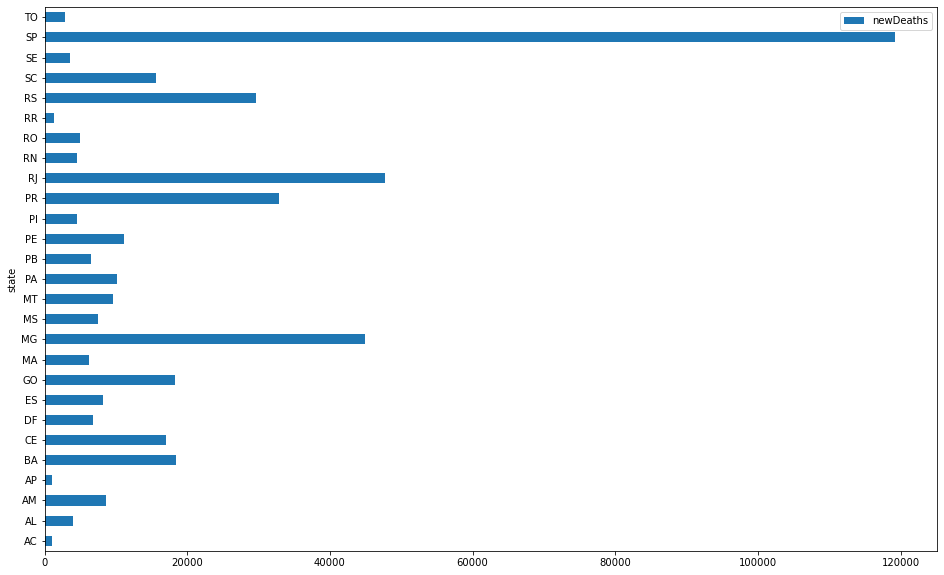

In [15]:
# Gráfico - Total de Mortes por Estado - 2021

base_2021_filtered[['newDeaths', 'state', 'newCases']].groupby('state', as_index=False).sum().plot.barh(x='state', y='newDeaths', figsize=(16,10))

<AxesSubplot:xlabel='state', ylabel='newDeaths'>

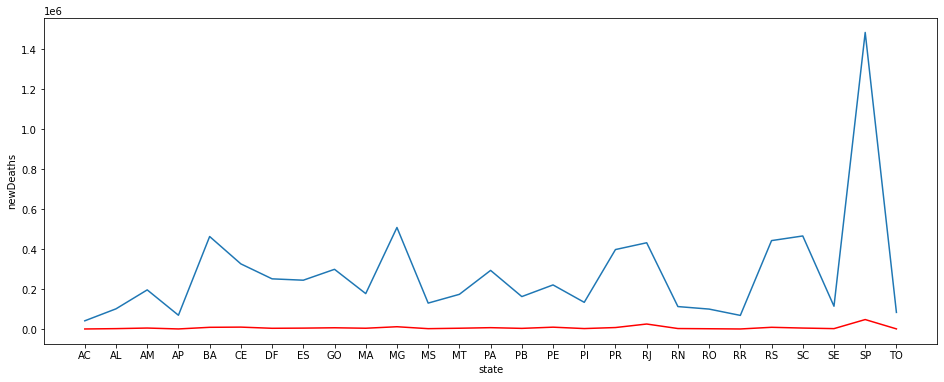

In [16]:
# Contaminação e óbitos por estado - 2021

plt.figure(figsize=(16,6))
sns.lineplot(data=df_state_2020, x='state', y='newDeaths', color='red')
sns.lineplot(data=df_state_2020, x='state', y='newCases')

In [17]:
# Agrupamento por data - Casos e Óbitos - 2021

df_base_2021 = base_2021_filtered[['newDeaths','newCases']].groupby('date').sum()
df_base_2021

,newDeaths,newCases
date,,
2021-01-01,471,22708
2021-01-02,350,19064
2021-01-03,311,17015
2021-01-04,607,25566
2021-01-05,1196,58206
...,...,...
2021-12-27,104,8418
2021-12-28,175,8490
2021-12-29,131,10498


In [18]:
#Dados Estatísticos - 2021

df_base_2021.describe()


,newDeaths,newCases
count,365.000000,365.000000
mean,1222.739726,42044.150685
std,953.862150,28431.897735
min,25.000000,1580.000000
25%,471.000000,15775.000000
50%,1031.000000,37525.000000
75%,1757.000000,63765.000000
max,4197.000000,140653.000000


In [19]:
#Dia com maior número de óbitos

df_base_2021.loc[df_base_2021['newDeaths']==4197]

,newDeaths,newCases
date,,
2021-03-31,4197,96157


<AxesSubplot:xlabel='date', ylabel='newDeaths'>

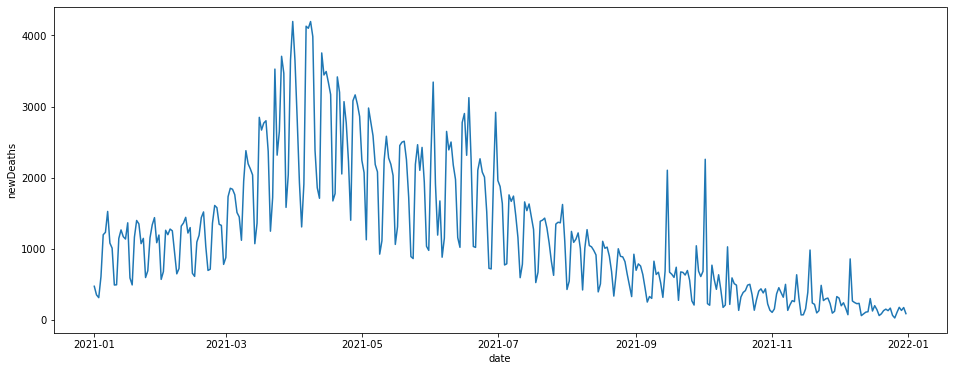

In [20]:
#Evolução dos óbitos em 2021

plt.figure(figsize=(16,6))
sns.lineplot(data=df_base_2021, x='date', y='newDeaths')

In [21]:
#Dados sobre casos por cidades do Brasil - 2022

base_2022 = pd.read_csv('cases-brazil-cities-time_2022.csv', index_col='date', parse_dates=True)
base_2022

,epi_week,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
date,,,,,,,,,,,
2022-01-01,152,GO,Abadia de Goiás/GO,5200050,0,44,1,2003,480.454,21871.588,0.022
2022-01-01,152,MG,Abadia dos Dourados/MG,3100104,0,20,0,601,284.819,8558.815,0.033
2022-01-01,152,GO,Abadiânia/GO,5200100,1,47,1,603,225.171,2888.900,0.078
2022-01-01,152,PA,Abaetetuba/PA,1500107,0,226,0,9915,140.864,6179.919,0.023
2022-01-01,152,MG,Abaeté/MG,3100203,0,44,0,1679,189.142,7217.470,0.026
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,245,PR,Ângulo/PR,4101150,0,11,0,925,375.299,31559.195,0.012
2022-11-11,245,BA,Érico Cardoso/BA,2900504,0,6,0,667,57.072,6344.526,0.009
2022-11-11,245,PA,Óbidos/PA,1505106,0,164,2,8615,312.542,16417.967,0.019


In [22]:
#Filtrando a base com as informações que serão utilizadas

filtered_2022 = (base_2022['state'] != 'TOTAL') & (base_2022['deaths'] != 0)
base_2022_filtered = base_2022[filtered_2022]
base_2022_filtered.drop(columns=['ibgeID', 'city', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases'])

,epi_week,state,newDeaths,deaths,newCases,totalCases
date,,,,,,
2022-01-01,152,GO,0,44,1,2003
2022-01-01,152,MG,0,20,0,601
2022-01-01,152,GO,1,47,1,603
2022-01-01,152,PA,0,226,0,9915
2022-01-01,152,MG,0,44,0,1679
...,...,...,...,...,...,...
2022-11-11,245,RS,0,7,0,618
2022-11-11,245,PR,0,11,0,925
2022-11-11,245,BA,0,6,0,667


In [23]:
#Total de Mortes por Estado - 2022

base_2022_filtered[['newDeaths', 'state']].groupby('state').sum()

,newDeaths
state,
AC,179
AL,763
AM,536
AP,142
BA,3294
CE,4388
DF,724
ES,1508
GO,3096


<AxesSubplot:ylabel='state'>

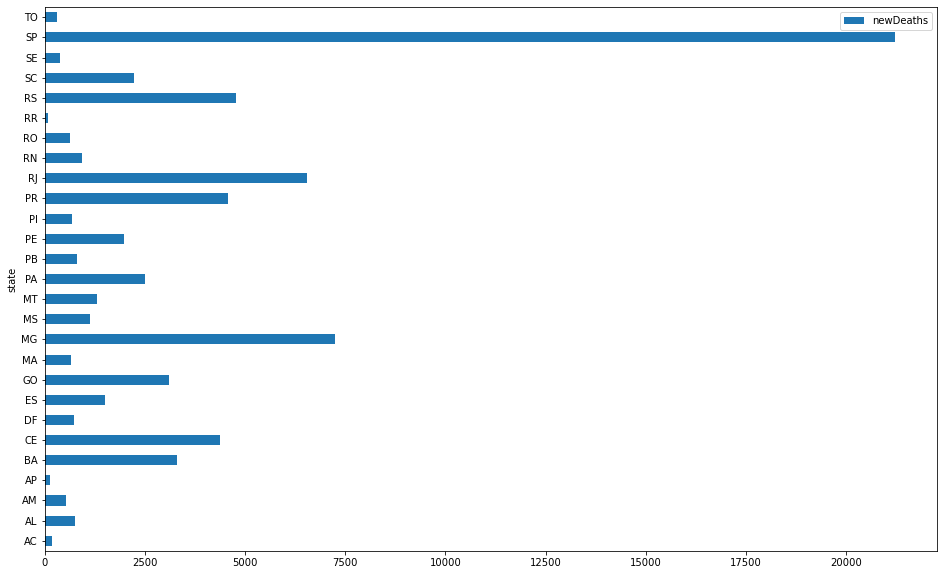

In [24]:
#Gráfico - Total de Mortes por Estado - 2022

base_2022_filtered[['newDeaths', 'state', 'newCases']].groupby('state', as_index=False).sum().plot.barh(x='state', y='newDeaths', figsize=(16,10))

<AxesSubplot:xlabel='state', ylabel='newDeaths'>

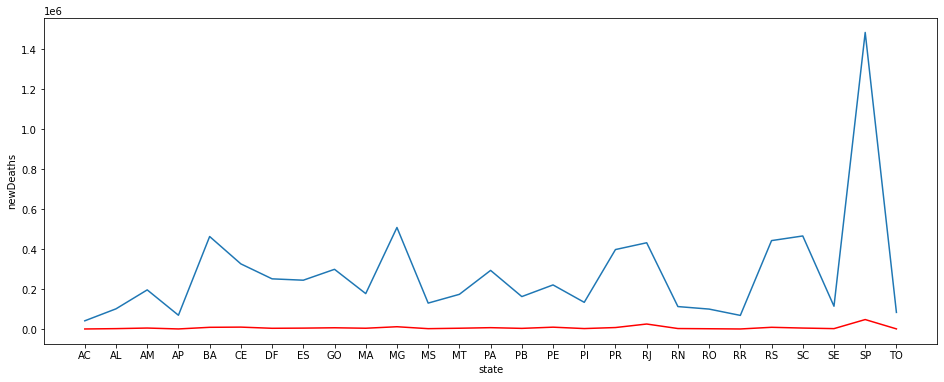

In [25]:
#Contaminação e óbitos por estado - 2022

plt.figure(figsize=(16,6))
sns.lineplot(data=df_state_2020, x='state', y='newDeaths', color='red')
sns.lineplot(data=df_state_2020, x='state', y='newCases')

In [26]:
# Agrupamento por data - Casos e Óbitos - 2022

df_base_2022 = base_2022_filtered[['newDeaths','newCases']].groupby('date').sum()
df_base_2022

,newDeaths,newCases
date,,
2022-01-01,49,3883
2022-01-02,43,2779
2022-01-03,78,12915
2022-01-04,183,18941
2022-01-05,156,32224
...,...,...
2022-11-07,47,4042
2022-11-08,92,12661
2022-11-09,81,9406


<AxesSubplot:xlabel='date', ylabel='newDeaths'>

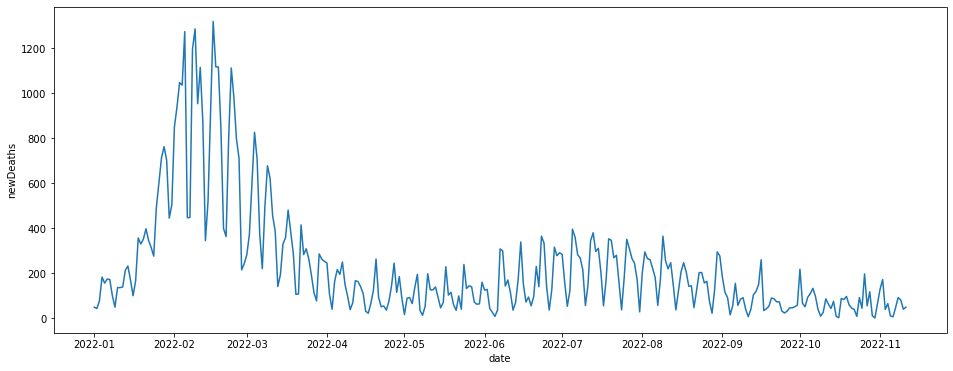

In [27]:
#Evolução dos óbitos em 2022

plt.figure(figsize=(16,6))
sns.lineplot(data=df_base_2022, x='date', y='newDeaths')

In [28]:
#Unindo as bases da COVID - Casos/Obitos diários

base_total = pd.concat([df_base_2020, df_base_2021, df_base_2022])
base_total

,newDeaths,newCases
date,,
2020-03-17,1,11
2020-03-18,3,58
2020-03-19,4,47
2020-03-20,4,47
2020-03-21,7,69
...,...,...
2022-11-07,47,4042
2022-11-08,92,12661
2022-11-09,81,9406


In [29]:
#Dados Estatísticos da Base Total

base_total.describe()

,newDeaths,newCases
count,970.000000,970.000000
mean,739.164948,36795.130928
std,761.346433,35500.653667
min,1.000000,11.000000
25%,172.000000,12703.250000
50%,510.500000,27862.500000
75%,1069.000000,49488.000000
max,4197.000000,295463.000000


In [30]:
# Unindo as bases de Dados

total_bases = pd.concat([base_2020, base_2021, base_2022])
total_bases

,epi_week,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
date,,,,,,,,,,,
2020-02-25,9,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000
2020-02-25,9,TOTAL,TOTAL,0,0,0,1,1,0.000,0.000,0.000
2020-02-26,9,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
2020-02-26,9,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000
2020-02-27,9,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,245,PR,Ângulo/PR,4101150,0,11,0,925,375.299,31559.195,0.012
2022-11-11,245,BA,Érico Cardoso/BA,2900504,0,6,0,667,57.072,6344.526,0.009
2022-11-11,245,PA,Óbidos/PA,1505106,0,164,2,8615,312.542,16417.967,0.019


In [31]:
#Filtrando a base com as informações que serão utilizadas

filtered_total = (total_bases['state'] != 'TOTAL')
total_bases_filtered = total_bases[filtered_total]
total_bases_filtered.drop(columns=['ibgeID', 'city', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases'])

,epi_week,state,newDeaths,deaths,newCases,totalCases
date,,,,,,
2020-02-25,9,SP,0,0,1,1
2020-02-26,9,SP,0,0,0,1
2020-02-27,9,SP,0,0,0,1
2020-02-28,9,SP,0,0,1,2
2020-02-29,9,SP,0,0,0,2
...,...,...,...,...,...,...
2022-11-11,245,RS,0,7,0,618
2022-11-11,245,PR,0,11,0,925
2022-11-11,245,BA,0,6,0,667


<AxesSubplot:xlabel='state'>

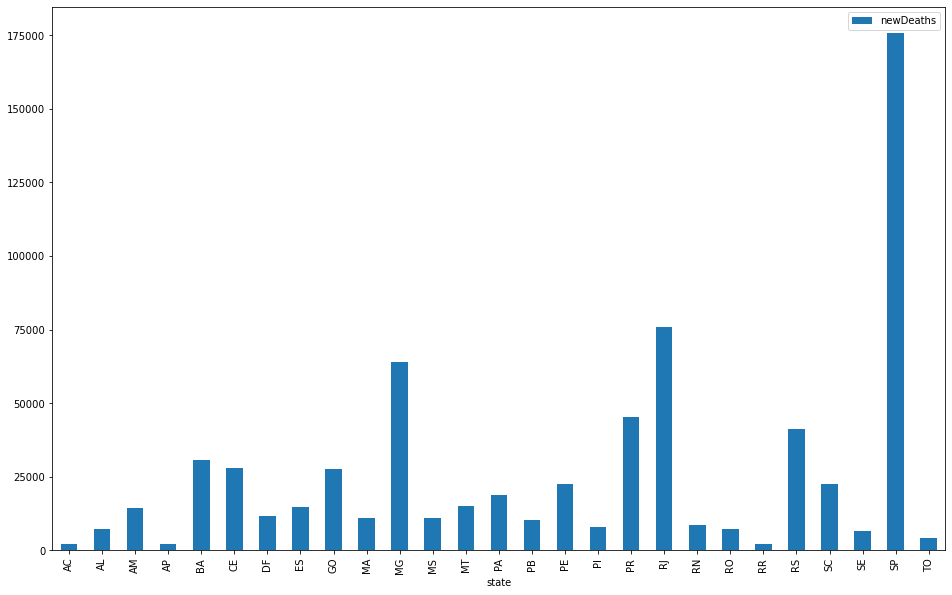

In [32]:
#Total de Óbitos no Brasil

total_bases_filtered[['newDeaths', 'state', 'newCases']].groupby('state', as_index=False).sum().plot.bar(x='state', y='newDeaths', figsize=(16,10))


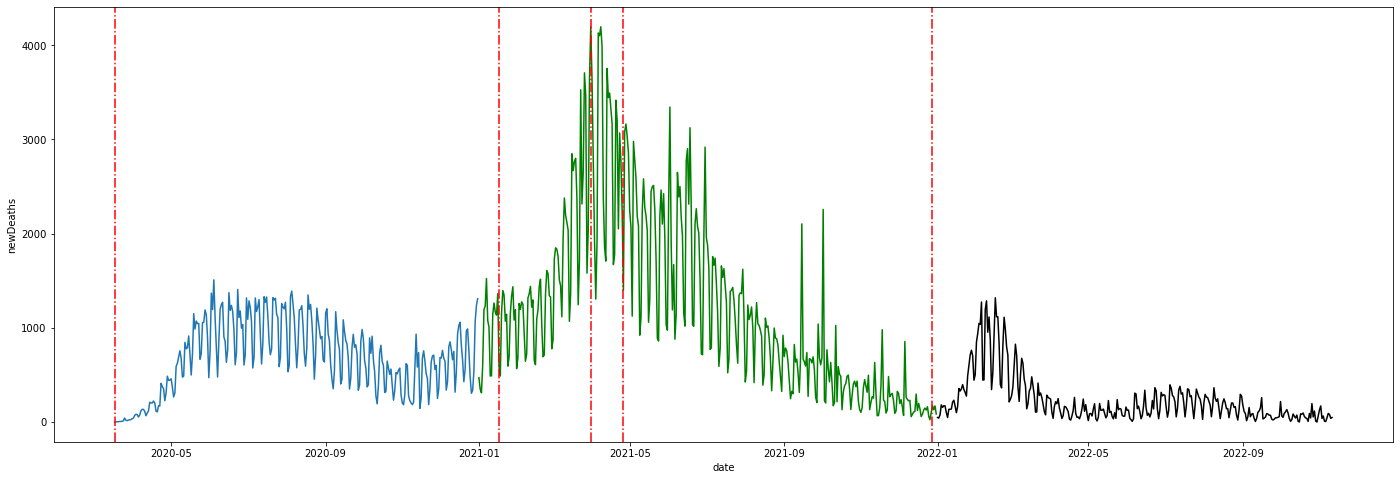

In [128]:
# Série Temporal - Marcos da Covid no Brasil.

plt.figure(figsize=(24,8))
sns.lineplot(data=df_base_2020, x='date', y='newDeaths')
sns.lineplot(data=df_base_2021, x='date', y='newDeaths', color = 'green')
sns.lineplot(data=df_base_2022, x='date', y='newDeaths', color = 'black')
plt.axvline(dt.datetime(2020, 3, 17), 0, 1000, linestyle='-.', color= 'red') #Primeira morte confirmada
plt.axvline(dt.datetime(2021, 1, 17), 0, 1000, linestyle='-.', color= 'red') #Início da Vacinação
plt.axvline(dt.datetime(2021, 3, 31), 0, 1000, linestyle='-.', color= 'red') #Maior número de óbitos diários
plt.axvline(dt.datetime(2021, 4, 26), 0, 1000, linestyle='-.', color= 'red') #Mortes por Covid-19 em 2021 superam o total de 2020
plt.axvline(dt.datetime(2021, 12, 28), 0, 1000, linestyle='-.', color= 'red') #Brasil tem 80% da população vacinada



REFERÊNCIAS

http://ba.corens.portalcofen.gov.br/ha-1-ano-brasil-aplicava-1a-dose-da-vacina-contra-a-covid-19_67938.html

https://pebmed.com.br/retrospectiva-2020-o-que-temos-sobre-a-covid-19-ate-agora-e-book/

https://butantan.gov.br/noticias/retrospectiva-2021-segundo-ano-da-pandemia-e-marcado-pelo-avanco-da-vacinacao-contra-covid-19-no-brasil

https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil